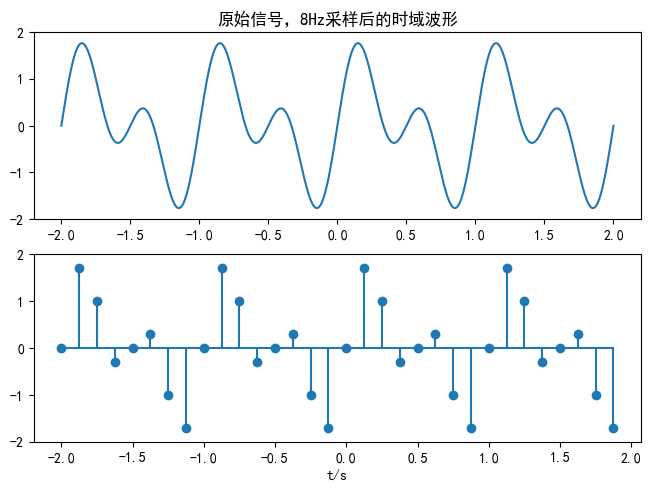

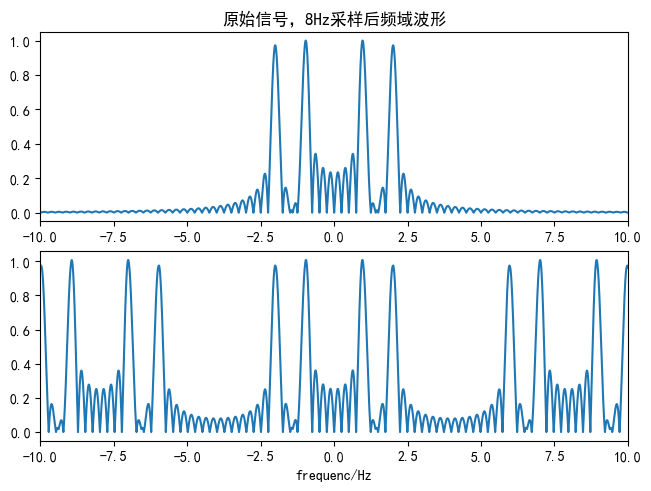

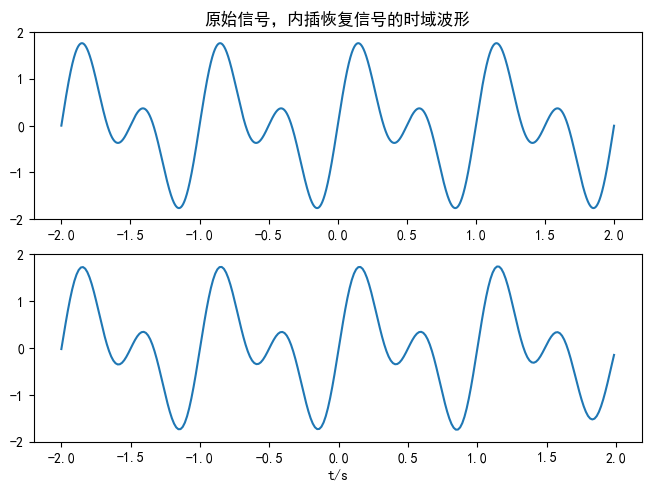

In [22]:
import numpy as np
from math import *
from scipy import fft
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来显示负号

def signfunc(f):          #定义信号函数
    f1=1;f2=2
    t=np.arange(-2,2,1/f)
    return t,np.sin(2*pi*f1*t)+np.sin(2*pi*f2*t)

#原始信号
fa=10000;ta,xa=signfunc(fa);N=len(xa)
N0=N*500
He_a=np.abs(fft.fft(xa,N0));He_a=He_a/np.max(He_a)#原始信号的频谱
freq_a=fft.fftfreq(N0,1/fa)
He_a=fft.fftshift(He_a);freq_a=fft.fftshift(freq_a)

def samp_spec(f_samp,f_anal,He,m):  #定义采样后的频谱合成函数
    N=len(He);M=int((f_samp*N/f_anal)*(m-1)+N)  #合成频谱的长度
    He_retn=np.append(He,np.zeros(M-N))
    for i in range(m-1):
        N_fron=int((f_samp*N/f_anal)*(i+1))
        He_fron=np.zeros(N_fron)
        He_midd=np.append(He_fron,He)
        He_back=np.zeros(M-N_fron-N)
        He_shift=np.append(He_midd,He_back)
        He_retn=He_retn+He_shift
    freq=fft.fftfreq(M,1/f_anal)
    freq=fft.fftshift(freq)
    return freq,He_retn

#对原始信号进行采样
fs1=8;m=5 #采样频率，频谱搬移次数
t1,x_hat1=signfunc(fs1)
freq1,He1=samp_spec(fs1,fa,He_a,m)

#绘制原始信号及各采样信号的时域波形
fig,ax=plt.subplots(2,1,constrained_layout=True)
ax[0].plot(ta,xa);ax[1].stem(t1,x_hat1,basefmt="")
ax[0].set_ylim([-2,2]);ax[1].set_ylim([-2,2])
ax[0].set_title('原始信号，8Hz采样后的时域波形')
ax[1].set_xlabel('t/s')
fig.savefig('./freq_samp1.png',dpi=500)

#绘制原信号及采样信号的幅度响应
fig,ax=plt.subplots(2,1,constrained_layout=True)
ax[0].plot(freq_a,He_a);ax[1].plot(freq1,He1)
ax[0].set_xlim([-10,10]);ax[1].set_xlim([-10,10])
ax[0].set_title('原始信号，8Hz采样后频域波形')
ax[1].set_xlabel('frequenc/Hz')
fig.savefig('./freq_samp2.png',dpi=500)

from scipy import signal
num=8
t_1=np.arange(-2,2,1/(num*fs1))  #插点
x_1=np.zeros(len(t1)*num)                    #采样插0
for i in range(0,len(x_1),num):
    x_1[i]=x_hat1[i//num]
b,a=signal.butter(8,5/(num*fs1),'lowpass') #滤波
x_1_f=fs1*signal.filtfilt(b,a,x_1)          

#原始信号和恢复信号绘制
fig,ax=plt.subplots(2,1,constrained_layout=True)
ax[0].plot(ta,xa);ax[1].plot(t_1,x_1_f)
ax[0].set_ylim([-2,2]);ax[1].set_ylim([-2,2])
ax[0].set_title('原始信号，内插恢复信号的时域波形')
ax[1].set_xlabel('t/s')
fig.savefig('./freq_samp3.png',dpi=500)